In [1]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Identifying Null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\varsh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

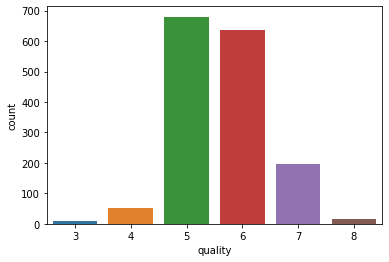

In [4]:
sns.countplot(data['quality'])

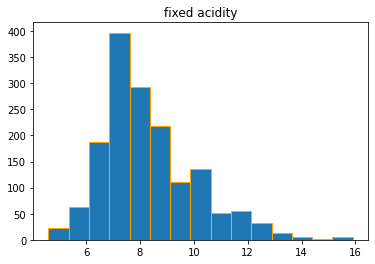

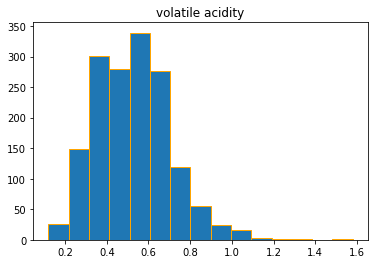

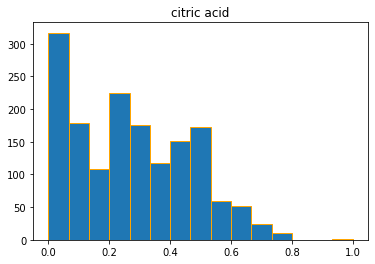

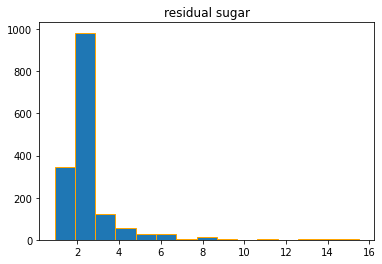

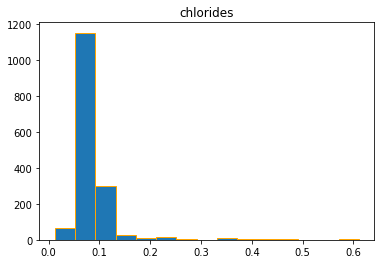

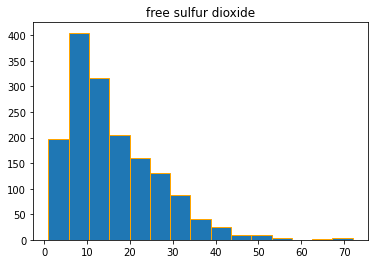

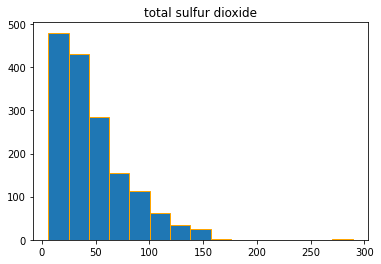

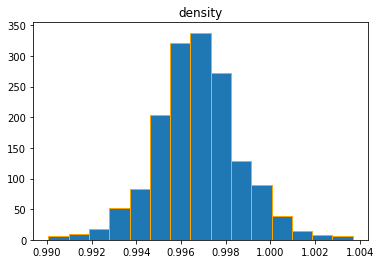

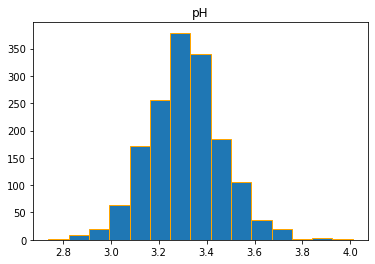

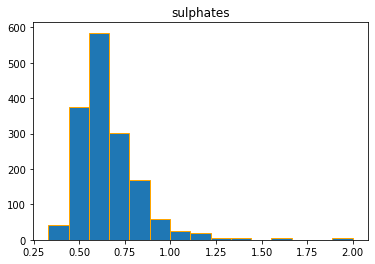

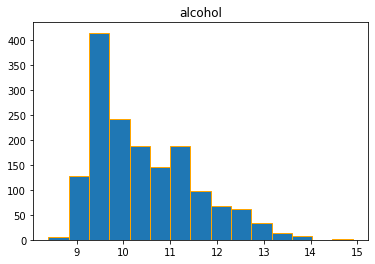

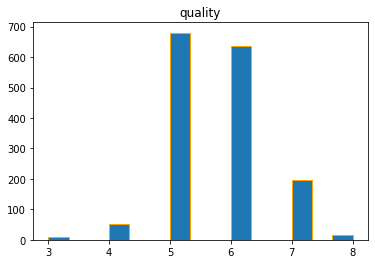

In [28]:
# Interval vs Frequency
for i in data.columns:
    plt.hist(data[i],ec="orange",bins=15)
    plt.title(i)
    plt.show()

<AxesSubplot:>

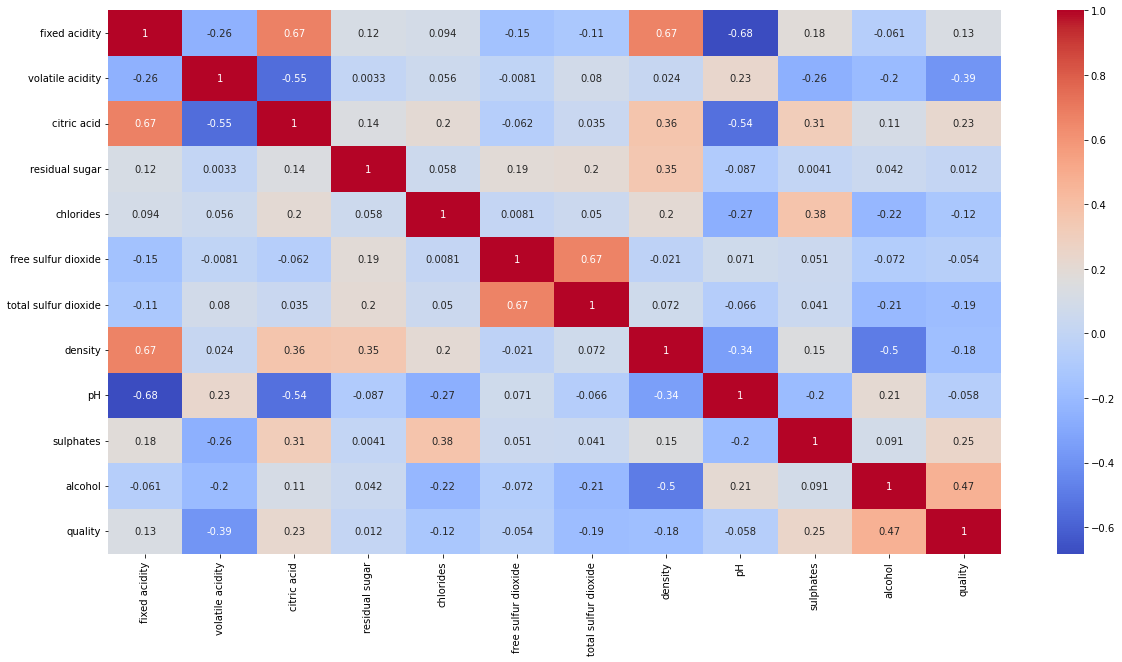

In [6]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [7]:
x = data.drop(columns= ['total sulfur dioxide','quality','density','citric acid'])
y = data['quality']
y.value_counts() #Over Sampling

5    680
6    636
7    198
4     52
8     17
3      9
Name: quality, dtype: int64

In [8]:
# Class Imbalncement

# Under sampling is thing that we reduce the length of the majority class
# Over sampling is thing that we increase the length of the minority class

In [9]:
oversample = SMOTE() #OverSampling
x,y = oversample.fit_resample(x,y)    

In [10]:
y.value_counts()

5    680
6    680
7    680
4    680
8    680
3    680
Name: quality, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.8676470588235294)

In [14]:
# model = DecisionTreeClassifier(max_depth =10,criterion="gini")
# model.fit(x_train, y_train)
# model.score(x_train, y_train), model.score(x_test, y_test)

In [15]:
inp_data = (7.9,0.35,3.6,0.078,15.0,3.35,0.86,12.8)
inp_arr = np.array(inp_data).reshape(1, -1)
prediction = model.predict(inp_arr)
print(prediction[0])

7


C:\Users\varsh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[132,   0,   0,   0,   0,   0],
       [  1, 123,   4,   2,   0,   0],
       [  2,   9, 105,  21,   5,   0],
       [  1,   5,  23,  84,  19,   4],
       [  0,   0,   0,   9, 141,   3],
       [  0,   0,   0,   0,   0, 123]], dtype=int64)

In [18]:
confusion_matrix(y_train,y_pred_train)

array([[548,   0,   0,   0,   0,   0],
       [  0, 550,   0,   0,   0,   0],
       [  0,   0, 538,   0,   0,   0],
       [  0,   0,   0, 544,   0,   0],
       [  0,   0,   0,   0, 527,   0],
       [  0,   0,   0,   0,   0, 557]], dtype=int64)

In [19]:
import pickle
pickle.dump(model, open('winequality.pkl', 'wb'))